In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as  sns
sns.set()

In [44]:
raw_data = pd.read_csv('../data/budget_data.csv')
raw_data

,date,category,amount
0,2022-07-06 05:57:10 +0000,Restuarant,5.50
1,2022-07-06 05:57:27 +0000,Market,2.00
2,2022-07-06 05:58:12 +0000,Coffe,30.10
3,2022-07-06 05:58:25 +0000,Market,17.33
4,2022-07-06 05:59:00 +0000,Restuarant,5.50
...,...,...,...
3603,2024-09-28 13:31:37 +0000,Market,8.00
3604,2024-09-29 02:57:07 +0000,Transport,0.50
3605,2024-09-29 04:29:03 +0000,Market,7.40
3606,2024-09-29 04:53:24 +0000,Coffe,15.00


In [46]:
print("Table size:", raw_data.shape)

Table size: (3608, 3)


In [48]:
raw_data.dtypes

date         object
category     object
amount      float64
dtype: object

In [58]:
raw_data['date'] = pd.to_datetime(raw_data['date'])
raw_data.dtypes

date        datetime64[ns, UTC]
category                 object
amount                  float64
dtype: object

In [62]:
raw_data['year'] = raw_data['date'].dt.year
raw_data['month'] = raw_data['date'].dt.month
raw_data['month_name'] = raw_data['date'].dt.strftime('%B')
raw_data['weekday'] = raw_data['date'].dt.day_name()
raw_data['day'] = raw_data['date'].dt.day
raw_data['hour'] = raw_data['date'].dt.hour

raw_data.head()

,date,category,amount,year,month,month_name,weekday,day,hour
0,2022-07-06 05:57:10+00:00,Restuarant,5.50,2022,7,July,Wednesday,6,5
1,2022-07-06 05:57:27+00:00,Market,2.00,2022,7,July,Wednesday,6,5
2,2022-07-06 05:58:12+00:00,Coffe,30.10,2022,7,July,Wednesday,6,5
3,2022-07-06 05:58:25+00:00,Market,17.33,2022,7,July,Wednesday,6,5
4,2022-07-06 05:59:00+00:00,Restuarant,5.50,2022,7,July,Wednesday,6,5


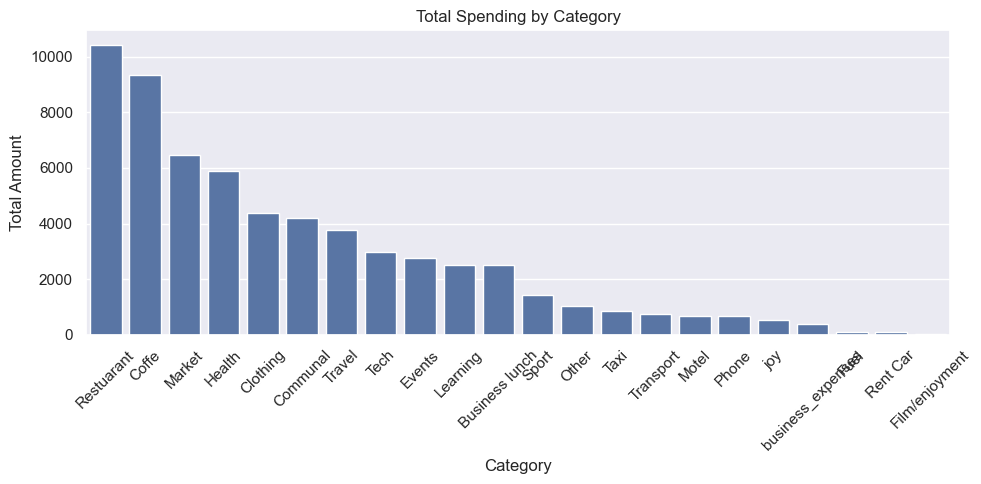

In [66]:
category_sum = raw_data.groupby('category')['amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=category_sum.index, y=category_sum.values)
plt.title('Total Spending by Category')
plt.xlabel('Category')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

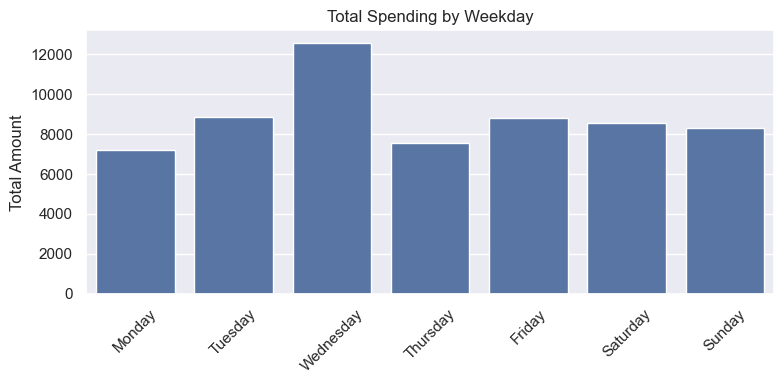

In [68]:
weekday_sum = raw_data.groupby('weekday')['amount'].sum()
weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 4))
sns.barplot(x=weekday_order, y=weekday_sum[weekday_order])
plt.title('Total Spending by Weekday')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

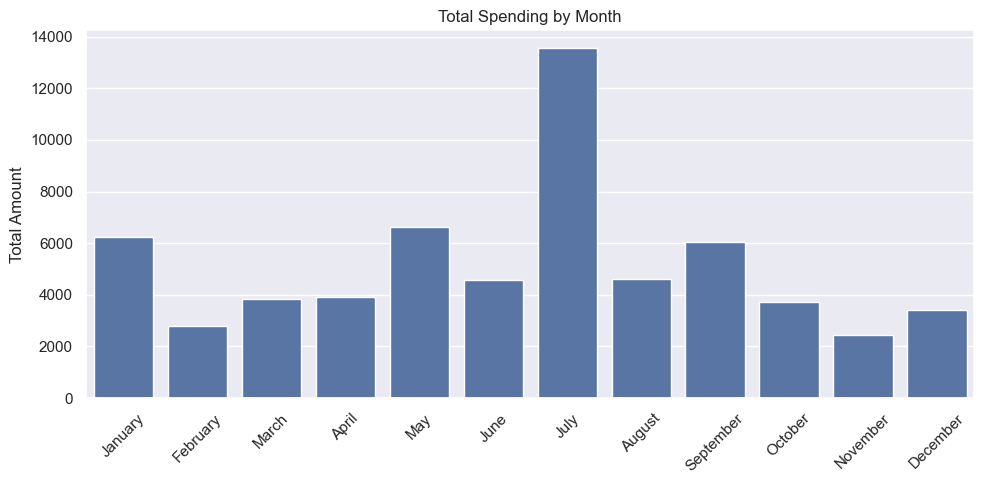

In [70]:
month_sum = raw_data.groupby('month_name')['amount'].sum()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(10, 5))
sns.barplot(x=month_order, y=month_sum[month_order])
plt.title('Total Spending by Month')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


X = raw_data[['month', 'day', 'hour']]
y = raw_data['amount']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_squared_error
print("MSE:", mean_squared_error(y_test, y_pred))

MSE: 9188.072630357841


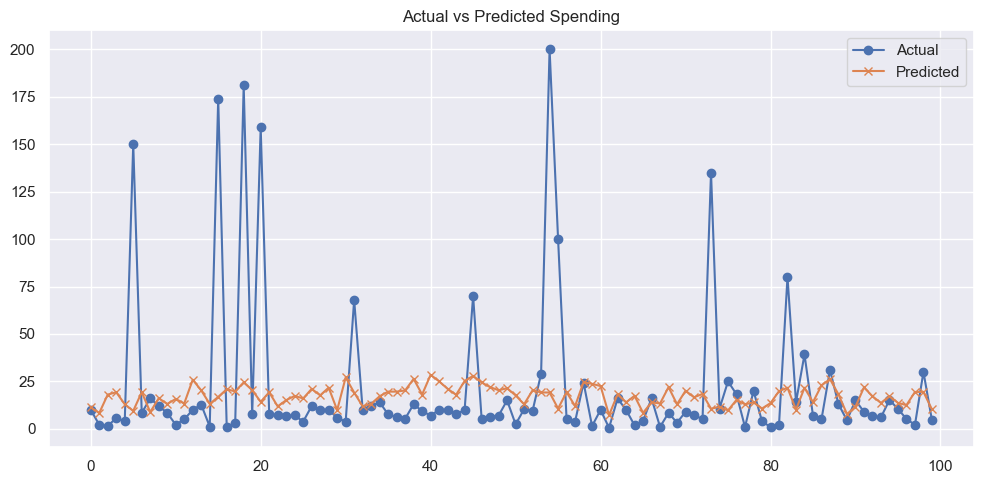

In [76]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Spending')
plt.legend()
plt.tight_layout()
plt.show()

In [82]:

df_encoded = pd.get_dummies(raw_data[['category']], drop_first=True)

X = pd.concat([raw_data[['month', 'day', 'hour']], df_encoded], axis=1)
y = raw_data['amount']

df_encoded


,category_Clothing,category_Coffe,category_Communal,category_Events,category_Film/enjoyment,category_Fuel,category_Health,category_Learning,category_Market,category_Motel,...,category_Phone,category_Rent Car,category_Restuarant,category_Sport,category_Taxi,category_Tech,category_Transport,category_Travel,category_business_expenses,category_joy
0,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3603,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3604,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
3605,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3606,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE with dummies:", mse)


MSE with dummies: 8270.322445136711


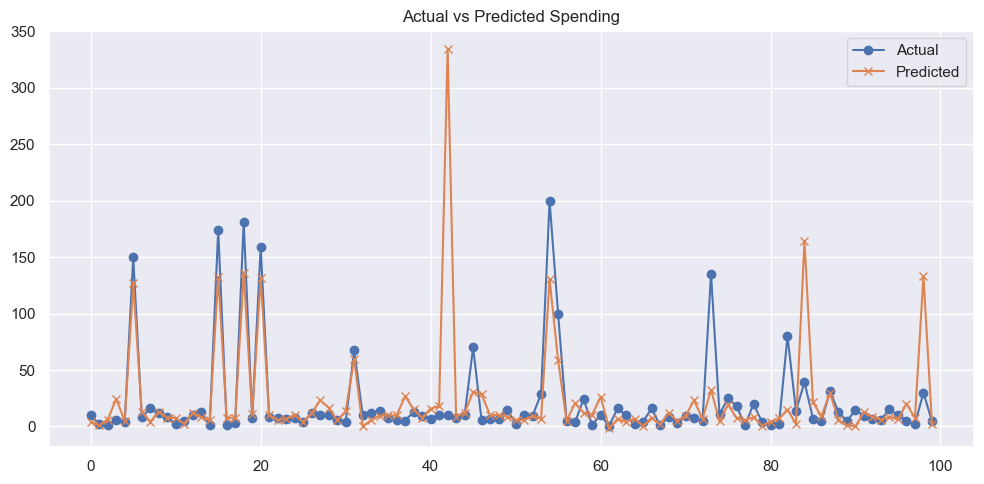

In [90]:
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:100], label='Actual', marker='o')
plt.plot(y_pred[:100], label='Predicted', marker='x')
plt.title('Actual vs Predicted Spending')
plt.legend()
plt.tight_layout()
plt.show()

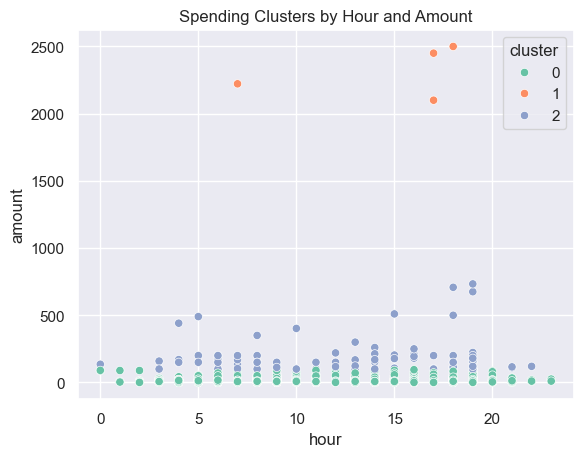

In [80]:
from sklearn.cluster import KMeans

features = raw_data[['amount', 'hour']]
kmeans = KMeans(3).fit(features)

raw_data['cluster'] = kmeans.labels_

sns.scatterplot(data=raw_data, x='hour', y='amount', hue='cluster', palette='Set2')
plt.title('Spending Clusters by Hour and Amount')
plt.show()